## Part g) VQE for Lipkin Hamiltonian

### Introduction
In this part, we implement the VQE algorithm tailored for the Lipkin Hamiltonian. Since our original VQE algorithm was designed for qubit systems of dimensions 1 and 2, we have added a new implementation specifically for the Lipkin Hamiltonian.

The Lipkin Hamiltonian has matrix dimensions of $3 \times 3$ and $5 \times 5$ for $J = 1$ and $J = 2$, respectively. Therefore, we require Hilbert spaces of dimensions 3 and 5.

Our approach is to use a number of qubits sufficient to represent a space that includes the required number of dimensions. For example, for $J = 1$, we use a 2-qubit system, which spans $2^2 = 4$ basis states, and restrict our attention to the first 3. For $J = 2$, we use a 3-qubit system, which spans $2^3 = 8$ basis states, and restrict our attention to the first 5.

To enforce this restriction, we project the resulting quantum state onto the first 3 or 5 basis states after executing the quantum circuit. We then renormalize this projected state before computing the expectation value.

Since our qubit system includes more states than those required by the Hamiltonian, we must ensure that the amplitudes of the irrelevant states remain close to zero. We do this by computing the norm of the projected state vector. If the norm falls below a certain threshold, it indicates that the quantum state has too much weight in the irrelevant subspace. In such cases, we apply a large penalty to the cost function. This penalty steers the optimization away from such parameter regions and encourages convergence toward solutions with significant overlap with the valid physical subspace


#### Lipkin Hamiltonian
Since we are working with the Lipkin Hamiltonian being originally $3\times3$ and $5\times5$ matrices for $J=1$ and $J=2$ respectively, we need to embedd the Hamiltonian in a larger Hilbert space Hamiltonian that is spanned by the number of qubits we are using.
Next we decompose the new Hamiltonian into the Pauli basis by the same idea as we have discussed earleir. 

Reminder that a general Hamiltonian can be expressed in the Pauli basis as follows:

$$
H = \sum_{P\in\{I,X,Y,Z\}^{\otimes n}} c_P P
$$

with coefficients $c_P$ being computed as follows:
$$
c_P = \frac{1}{2^n} \text{Tr}(H P)$$

This $\{I,X,Y,Z\}^{\otimes n}$ means that we are taking all tensor products $n$ matrices each choosen from the set $\{I,X,Y,Z\}$. There are thus $4^n$ 
operators, for $n=2$ we have $16$ operators, for $n=3$ we have $64$ operators.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from quantum_computing.p1.hamiltonian.hamiltonian import LipkinHamiltonian
from quantum_computing.p1.vge.lipkin_vqe import LipkinVQE
from quantum_computing.p1.quantum.utils import plot_eigenvalues
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [7, 3]
plt.rcParams['font.size'] = 12

V = 0.00, Energy = -1.000000
V = 0.20, Energy = -1.019804
V = 0.40, Energy = -1.077033
V = 0.60, Energy = -1.166190
V = 0.80, Energy = -1.280625
V = 1.00, Energy = -1.414214
V = 1.20, Energy = -1.562050
V = 1.40, Energy = -1.720465
V = 1.60, Energy = -1.886796
V = 1.80, Energy = -2.059126
V = 2.00, Energy = -2.236068


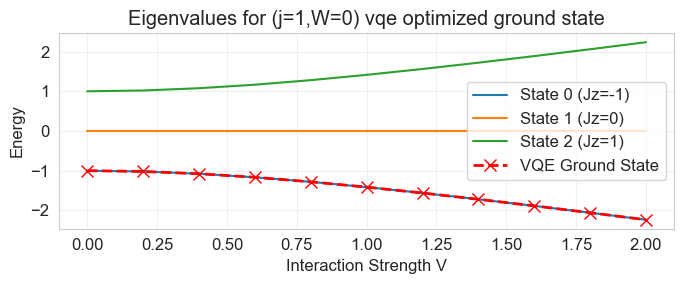

In [19]:

epsilon = 1.0 
V_values = np.linspace(0, 2.0, 11) 
W = 0
lipkin_classical = LipkinHamiltonian()

j1_eigenvalues_classical, j1_eigenstates_classical = lipkin_classical.solve_eigen_vs_V(1, epsilon, V_values,W)

lipkin_vqe_j1 = LipkinVQE(j=1, epsilon=epsilon, layers=1)
j1_eigenvalues_vqe, j1_eigenstates_vqe = lipkin_vqe_j1.solve_eigen_vs_V(V_values)

plot_eigenvalues(V_values, j1_eigenvalues_classical,1,"Eigenvalues for (j=1,W=0) vqe optimized ground state")
plt.plot(V_values, j1_eigenvalues_vqe, 'x--', color='red', linewidth=2, markersize=8, 
         label='VQE Ground State')
plt.legend()
plt.show()


### Energy History for (J=1,W=0,V=2)

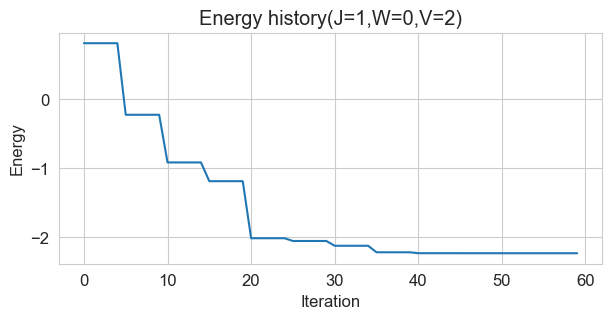

In [33]:
energy_history = lipkin_vqe_j1.get_energy_history()
plt.plot(energy_history)
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title('Energy history(J=1,W=0,V=2)')
plt.show()

Looking at the energy history for the Lipkin Hamiltonian with $J=1$, $W=0$ and $V=0$, we that the optimization nicely converges to the ground state and at around 20 iterations the energy is already very close to the exact ground state energy.

### VQE optimization for (J=1,W=1.5) vs $V$ values

V = 0.00, Energy = -3.000000
V = 0.20, Energy = -3.000000
V = 0.40, Energy = -3.000000
V = 0.60, Energy = -3.000000
V = 0.80, Energy = -3.000000
V = 1.00, Energy = -3.000000
V = 1.20, Energy = -3.062050
V = 1.40, Energy = -3.220465
V = 1.60, Energy = -3.386796
V = 1.80, Energy = -3.559126
V = 2.00, Energy = -3.736068


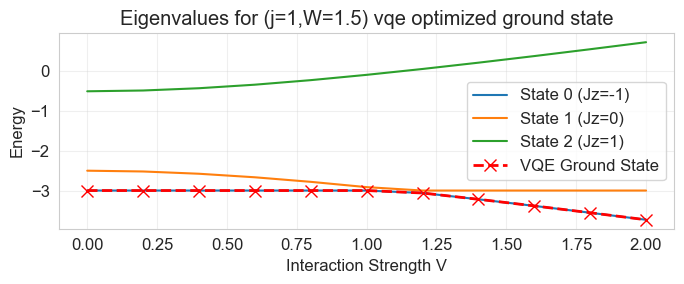

In [ ]:
W = 1.5 
j1_eigenvalues_classical = lipkin_classical.solve_eigen_vs_V(1, epsilon, V_values,W)[0]
j1_vqe = LipkinVQE(1,epsilon,W=W,layers=1)
j1_eigenvalues_vqe = j1_vqe.solve_eigen_vs_V(V_values)[0]
plot_eigenvalues(V_values, j1_eigenvalues_classical,1,"Eigenvalues for (j=1,W=1.5) vqe optimized ground state")
plt.plot(V_values, j1_eigenvalues_vqe, 'x--', color='red', linewidth=2, markersize=8, 
         label='VQE Ground State')
plt.legend()
plt.show()

Using a VQE algorithm specifically designed for the Lipkin Hamiltonian, We we are able to accurately compute the ground state energy of the Lipkin Hamiltonian with $W=0$ with no more complexity then just one variational layer. 

### Energy History for (J=1,W=1.5,V=2)

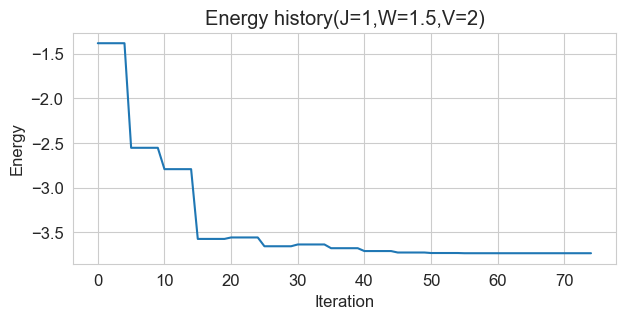

In [34]:
energy_history = j1_vqe.get_energy_history()
plt.plot(energy_history)
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title('Energy history(J=1,W=1.5,V=2)')
plt.show()

Looking at the energy history for the Lipkin Hamiltonian with $J=1$, $W=1.5$ and $V=2$, we see similar convergence behavior as for the case with $W=0$. The energy converges to the ground state energy at around 20 iterations.

### VQE optimized ground state energy for (J=2,W=0) vs $V$ values

V = 0.00, Energy = -2.000000
V = 0.20, Energy = -2.116601
V = 0.40, Energy = -2.433105
V = 0.60, Energy = -2.884441
V = 0.80, Energy = -3.417601
V = 1.00, Energy = -4.000000
V = 1.20, Energy = -4.613025
V = 1.40, Energy = -5.245951
V = 1.60, Energy = -5.892368
V = 1.80, Energy = -6.548282
V = 2.00, Energy = -7.211103


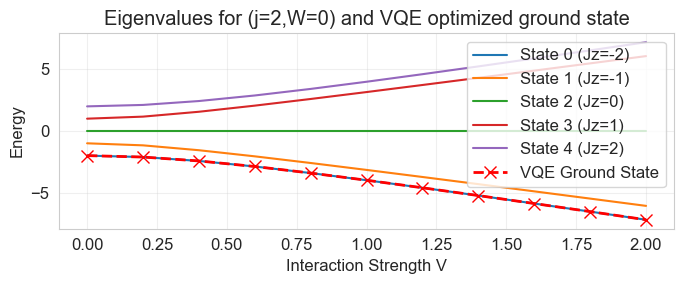

In [ ]:

j2_eigenvalues_classical,j2_eigenstates_classical = lipkin_classical.solve_eigen_vs_V(2, epsilon, V_values,W)

lipkin_vqe_j2 = LipkinVQE(j=2, epsilon=epsilon, layers=1)
j2_eigenvalues_vqe,j2_eigenstates_vqe = lipkin_vqe_j2.solve_eigen_vs_V(V_values)

plot_eigenvalues(V_values, j2_eigenvalues_classical,2,"Eigenvalues for (j=2,W=0) and VQE optimized ground state")

plt.plot(V_values, j2_eigenvalues_vqe, 'x--', color='red', linewidth=2, markersize=8, 
         label='VQE Ground State')
plt.legend()
plt.show()

### Energy history for (J=2,W=0,V=0)

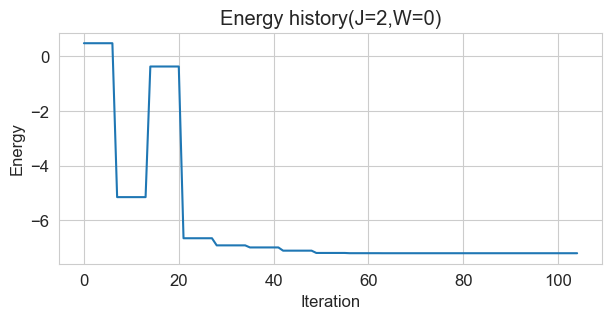

In [32]:
energy_history = lipkin_vqe_j2.get_energy_history()
plt.plot(energy_history)
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title('Energy history(J=2,W=0,V=2)')
plt.show()


Observing the energy history for the Lipkin Hamiltonian with $J=2$ and $W=0$, we see that there are some fluctuations in the bigginning but the energy converges to the ground state energy at around 20 iterations.

### VQE optimized ground state energy for (J=2,W=1.5) vs $V$ values

V = 0.00, Energy = -9.000000
V = 0.20, Energy = -9.088375
V = 0.40, Energy = -9.062050
V = 0.60, Energy = -9.706971
V = 0.80, Energy = -10.162857
V = 1.00, Energy = -10.676939
V = 1.20, Energy = -11.236308
V = 1.40, Energy = -11.817407
V = 1.60, Energy = -12.416485
V = 1.80, Energy = -12.991812
V = 2.00, Energy = -13.664830


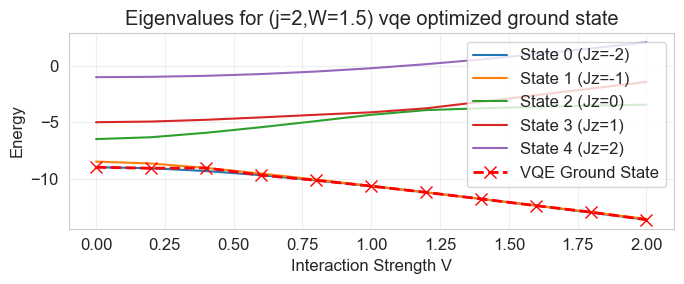

In [25]:
W = 1.5 
j2_eigenvalues_classical = lipkin_classical.solve_eigen_vs_V(2, epsilon, V_values,W)[0]
j2_vqe = LipkinVQE(2,epsilon,W=W,layers=1)
j2_eigenvalues_vqe = j2_vqe.solve_eigen_vs_V(V_values)[0]
plot_eigenvalues(V_values, j2_eigenvalues_classical,2,"Eigenvalues for (j=2,W=1.5) vqe optimized ground state")
plt.plot(V_values, j2_eigenvalues_vqe, 'x--', color='red', linewidth=2, markersize=8, 
         label='VQE Ground State')
plt.legend()
plt.show()

### Energy History for $J=2$, $W=1.5$ and $V=0$

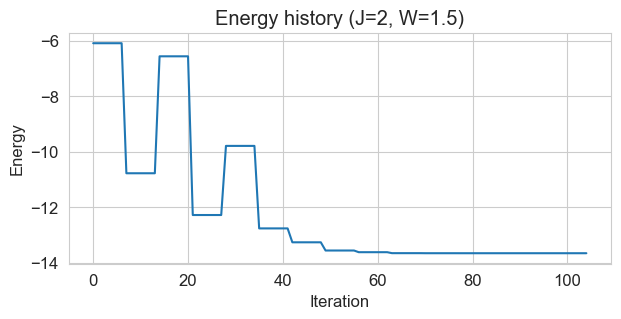

In [29]:
energy_history = j2_vqe.get_energy_history()
plt.plot(energy_history)
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title('Energy history (J=2, W=1.5)')
plt.show()

Looking at the energy history for the Lipkin Hamiltonian with $J=2$, $W=1.5$ and $V=2$, we see there are alot of fluctuations at the beginning, but on average the energy converges to the ground state energy. At around 40 iterations the energy is already very close to the exact ground state energy.

### Disucssion and Conclusion

We have build a Hamiltonian class for the Lipkin Hamiltonian and implemented a VQE algorithm specifically for the Lipkin Hamiltonian. Our implementation is able to accurately compute the ground state energy of the Lipkin Hamiltonian for different values of $J$, $W$ and $V$. We have also shown that the VQE algorithm converges to the ground state energy at around 20 iterations for $J=1$ and at around 40 iterations for $J=2$. The complexity of the VQE is only one variational layer. 

Since we have studied the probabilities behavior of how the amplitudes of the quantum states are affected earlier in part f, we will not repeat the same here since the results will be the same for the same choice of parameter. Given that the optimization process actually converges to the ground state energy.